<a href="https://colab.research.google.com/github/mohamedbasyouny1983/Array-python-practical-code/blob/main/titanic_logestic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
titanic = pd.read_csv('/content/titanic.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [ ]:
titanic["Survived"].replace({'Yes':1 ,'No':0},inplace = True)
titanic["Sex"].replace({'male':1 ,'female':0},inplace = True)

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,779,0,3,"Kilgannon, Mr. Thomas J",1,NaN,0,0,36865,7.7375,NaN,Q
887,435,0,1,"Silvey, Mr. William Baird",1,50.0,1,0,13507,55.9000,E44,S
888,342,1,1,"Fortune, Miss. Alice Elizabeth",0,24.0,3,2,19950,263.0000,C23 C25 C27,S
889,633,1,1,"Stahelin-Maeglin, Dr. Max",1,32.0,0,0,13214,30.5000,B50,C


In [ ]:
print("Titanic_data_size:", titanic.size)
print ("Titanic_Shape:" , titanic.shape)

Titanic_data_size: 10692
Titanic_Shape: (891, 12)


In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,779,0,3,"Kilgannon, Mr. Thomas J",1,29.699118,0,0,36865,7.7375,NaN,Q
887,435,0,1,"Silvey, Mr. William Baird",1,50.000000,1,0,13507,55.9000,E44,S
888,342,1,1,"Fortune, Miss. Alice Elizabeth",0,24.000000,3,2,19950,263.0000,C23 C25 C27,S
889,633,1,1,"Stahelin-Maeglin, Dr. Max",1,32.000000,0,0,13214,30.5000,B50,C


<ipython-input-35-cca671069098>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_corr = titanic.corr()


<Axes: >

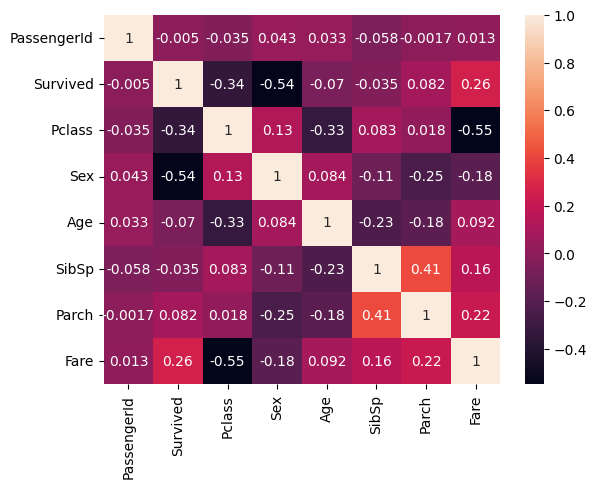

In [ ]:
titanic_corr = titanic.corr()
sns.heatmap(titanic_corr,annot=True)

In [ ]:
hig_corr = titanic.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Survived"]) >= 0.25]
hig_corr_features

<ipython-input-39-3252708215b6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hig_corr = titanic.corr()


Index(['Survived', 'Pclass', 'Sex', 'Fare'], dtype='object')

In [ ]:
titanic_to_model = titanic.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis=1)
titanic_to_model
#titanic_to_model.isnull().sum()

,Survived,Pclass,Sex,Age,Fare
0,0,2,1,28.000000,13.0000
1,0,3,1,25.000000,7.6500
2,0,3,1,20.000000,7.8542
3,0,3,0,29.000000,21.0750
4,0,1,1,31.000000,52.0000
...,...,...,...,...,...
886,0,3,1,29.699118,7.7375
887,0,1,1,50.000000,55.9000
888,1,1,0,24.000000,263.0000
889,1,1,1,32.000000,30.5000


In [ ]:
feature_cols = ['Pclass', 'Sex', 'Fare', 'Age']
X = titanic_to_model[feature_cols] # Features
Y = titanic_to_model.Survived # Target variable


0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    1
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=20)
X_train

,Pclass,Sex,Fare,Age
30,3,1,8.0500,19.000000
261,3,1,7.8958,29.699118
875,2,1,12.5250,51.000000
874,3,1,7.9250,21.000000
187,3,1,7.8958,36.000000
...,...,...,...,...
218,3,1,6.8583,29.699118
223,3,1,7.8292,29.699118
271,1,0,78.8500,26.000000
474,1,1,38.5000,47.000000


In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled  = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled


array([[ 0.84089621,  0.75615125, -0.47836688, -0.79680185],
       [ 0.84089621,  0.75615125, -0.48128919,  0.0241043 ],
       [-0.34416427,  0.75615125, -0.39355937,  1.65844705],
       ...,
       [-1.52922476, -1.32248675,  0.86339214, -0.25971616],
       [-1.52922476,  0.75615125,  0.09870321,  1.35154094],
       [-1.52922476, -1.32248675,  1.91803748,  0.89118177]])

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, Y_train)
Y_pred_LR = LR.predict(X_test)
Y_pred_LR

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
LR.score(X_train, Y_train)



0.7694610778443114

In [ ]:
accuracy_score(Y_test,Y_pred_LR)

0.8295964125560538

In [ ]:
confusion_matrix(Y_test,Y_pred_LR)


array([[126,  21],
       [ 17,  59]])

In [ ]:
print("\n", classification_report(Y_test,Y_pred_LR))


               precision    recall  f1-score   support

           0       0.88      0.86      0.87       147
           1       0.74      0.78      0.76        76

    accuracy                           0.83       223
   macro avg       0.81      0.82      0.81       223
weighted avg       0.83      0.83      0.83       223

